# **Natural Language Processing (S1-24_AIMLCZG530)  Assignment_1_PS-5**
---

### **Member Names:**
1. Vishal M (2023aa05334)
2. Shyam Kaushik (2023ac05633)
3. Jawaharlal Rajan S (2023ac05504)
4. Shailesh Kumar Singh (2023ac05475)
5. Aghav Sayali Sakaharam (2023ac05435)



## **Libraries**

In [ ]:
# Libraries Required
!pip install pandas spacy matplotlib wordcloud
!python -m spacy download en_core_web_sm


### **1. Dataset Preparation**

In [59]:
# Step 1: Load Dataset and Prepare Data
import pandas as pd

# Load the dataset
url = "Amazon Cell Phone reviews.csv"  # Use the correct path to your file
df = pd.read_csv(url)

# Inspect the first few rows of the dataset
df.head()


,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


### **Cleaning Dataset**

Removing punctuation, numbers, and special characters an eliminating stop words.

 In the output below 'I had the Samsung A600 for awhile ...' is reduced to 'samsung awhile ...'

In [60]:
# Step 2: Clean the Dataset
import spacy

# Load English spaCy model
nlp = spacy.load("en_core_web_sm")

# Function for text cleaning
def clean_text(text):
    doc = nlp(text.lower())
    # remove punctuation, numbers and stop words
    filtered = [token.text for token in doc if not token.is_stop and token.is_alpha]
    return ' '.join(filtered)

# Apply the function to the review body column
df['cleaned_body'] = df['body'].apply(clean_text)

df['cleaned_body'].head()



0    samsung awhile absolute doo doo read review de...
1    software issue nokia sprint phone text messagi...
2    great reliable phone purchased phone samsung d...
3    love phone need expect price bill received pho...
4    phone great purpose offers day bought nt case ...
Name: cleaned_body, dtype: object

### **Normalization**

Reducing words to their base or root form using stemming or lemmatization. When performing Part-of-Speech (POS) tagging, lemmatization is generally preferred over stemming because it provides the base dictionary form (lemma) of words while considering the context and meaning.

For example, in the output below, 'purchases' is reduced to 'purchase'.

In [61]:
# Step 3: Normalization (Stemming or Lemmatization)

# Load English tokenizer and lemmatizer

# Function to perform lemmatization
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

# Apply lemmatization
df['lemmatized_body'] = df['cleaned_body'].apply(lemmatize_text)

df['lemmatized_body'].head()


0    samsung awhile absolute doo doo read review de...
1    software issue nokia sprint phone text message...
2    great reliable phone purchase phone samsung di...
3    love phone need expect price bill receive phon...
4    phone great purpose offer day buy not case cas...
Name: lemmatized_body, dtype: object

### **2. POS tagging**
Apply a POS tagging algorithm or utilize a pretrained POS tagger to assign POS tags to the words in the dataset.

Here let's use pos_ attribute in spaCy that is powered by a pretrained POS tagger.

In the output below, (samsung, PROPN) means samsung is identified as proper noun rightly.

In [62]:
# Step 4: POS Tagging
# Function for POS tagging using SpaCy
def pos_tag_text(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

# Apply the POS tagging
df['pos_tags'] = df['lemmatized_body'].apply(pos_tag_text)
df['pos_tags'].head()

0    [(samsung, PROPN), (awhile, PROPN), (absolute,...
1    [(software, NOUN), (issue, NOUN), (nokia, NOUN...
2    [(great, ADJ), (reliable, ADJ), (phone, NOUN),...
3    [(love, NOUN), (phone, NOUN), (need, NOUN), (e...
4    [(phone, NOUN), (great, ADJ), (purpose, NOUN),...
Name: pos_tags, dtype: object

### **a. Calculate Frequency of POS Tags**

The frequency of various POS tags are printed as output.

In [63]:
# Step 5: Calculate Frequency of POS Tags
from collections import Counter

# Extract all POS tags into a list
all_pos_tags = [tag for sublist in df['pos_tags'] for _, tag in sublist]

# Calculate the frequency of each POS tag
pos_frequency = Counter(all_pos_tags)

# Print the frequencies
print(pos_frequency)


Counter({'NOUN': 26129, 'ADJ': 8286, 'VERB': 7011, 'PROPN': 3377, 'ADV': 2081, 'ADP': 524, 'AUX': 388, 'INTJ': 282, 'PART': 124, 'PRON': 74, 'X': 65, 'CCONJ': 54, 'SCONJ': 48, 'NUM': 36, 'DET': 16, 'PUNCT': 4})


### **b. Most common POS tags**

Let's consider top 10 most common tags

In [64]:
# Most common POS tags
common_pos_tags = pos_frequency.most_common(10)
print("Most common POS tags:", common_pos_tags)


Most common POS tags: [('NOUN', 26129), ('ADJ', 8286), ('VERB', 7011), ('PROPN', 3377), ('ADV', 2081), ('ADP', 524), ('AUX', 388), ('INTJ', 282), ('PART', 124), ('PRON', 74)]


### **c. Extract and print sentences containing specific POS tags.**

The output prints some example statement with NOUN, VERB etc.

In [65]:
# Extract Sentences Containing Specific POS Tags
# Function to extract sentences with specific POS tags
def extract_sentences_by_pos(df, pos_tag):
    sentences = []
    for pos_tags in df['pos_tags']:
        sentence = ' '.join([word for word, tag in pos_tags if tag == pos_tag])
        if sentence:
            sentences.append(sentence)
    return sentences

# Extract sentences containing nouns (NN)
noun_sentences = extract_sentences_by_pos(df, "NOUN")
verb_sentences = extract_sentences_by_pos(df, "VERB")
adj_sentences = extract_sentences_by_pos(df, "ADJ")
propn_sentences = extract_sentences_by_pos(df, "PROPN")

print("Sentences with Nouns:", noun_sentences[:5])
print("Sentences with Verbs:", noun_sentences[:5])
print("Sentences with Adj:", noun_sentences[:5])
print("Sentences with Propn:", noun_sentences[:5])


Sentences with Nouns: ['doo review rage thing nokia garage sale wonder hate menu scroll phone number category u pain vibrate class ring way silence thing way case mission nail process damage case time reason phone start problem opening button vibration reception elevator feat phone lose service pocket phone work ring tone phone battery life heat potatoe phone screen way customize scroll bar phone serve purpose comparison phone come sprint', 'software issue nokia sprint phone text message capability work sprint system patch time month hour sprint award win customer service team admit problem nokia design phone message retrieve way provider work sprint people hook server minute check inbox reply sprint server innovation money', 'phone purchase phone speed dialing number voice dial feature speed dialing thing snake phone game bowling tennis ringer feature ringer person ringtone download phone vibrate ringtone tone price range', 'love phone need price bill phone month accessory suppose pho

### 3. **POS TAG Visualizations**

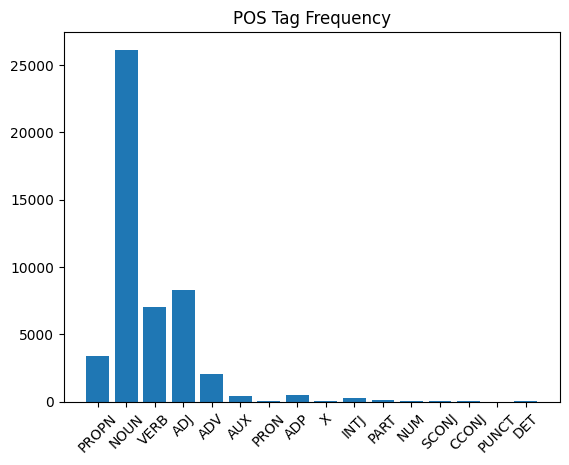

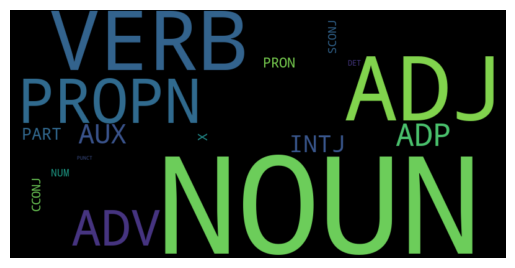

In [66]:
# Visualizations
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Bar chart for POS tag frequency
pos_labels, pos_values = zip(*pos_frequency.items())

plt.bar(pos_labels, pos_values)
plt.xticks(rotation=45)
plt.title('POS Tag Frequency')
plt.show()

# Word cloud for POS tags
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(pos_frequency)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


As per the above chart & wordcloud, NOUN, ADJECTIVE and VERB are the majorly occuring POS.

### **5. HMM POS tagging**

For HMM POS tagging, let's use NLTK’s HMM POS tagger.

In [67]:
import nltk
from nltk.corpus import treebank
from nltk.tag import hmm

# Download necessary NLTK resources
nltk.download('treebank')
nltk.download('punkt')

# Load tagged corpus from the treebank
train_sents = treebank.tagged_sents()

# Initialize and train the HMM POS tagger
trainer = hmm.HiddenMarkovModelTrainer()
hmm_tagger = trainer.train(train_sents)

[nltk_data] Downloading package treebank to
[nltk_data]     /Users/jawahar/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jawahar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


After HMM POS tagging, samsung is tagged as NNP (plural noun).

In [68]:
# Display HMM POS tagging on the first 4 rows
df_head = df.head(4).copy()  # Make sure it's a copy to avoid warnings
df_head.loc[:, 'hmm_pos_tags'] = df_head['lemmatized_body'].apply(lambda x: hmm_tagger.tag(x.split()))  # Use .loc[] to set the column
df_head[['body', 'hmm_pos_tags']]

/Users/jawahar/Documents/bitsMTech/sem2/nlp/assignment1/.venv/lib/python3.12/site-packages/nltk/tag/hmm.py:333: RuntimeWarning: overflow encountered in cast
  X[i, j] = self._transitions[si].logprob(self._states[j])
/Users/jawahar/Documents/bitsMTech/sem2/nlp/assignment1/.venv/lib/python3.12/site-packages/nltk/tag/hmm.py:335: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])
/Users/jawahar/Documents/bitsMTech/sem2/nlp/assignment1/.venv/lib/python3.12/site-packages/nltk/tag/hmm.py:331: RuntimeWarning: overflow encountered in cast
  P[i] = self._priors.logprob(si)
/Users/jawahar/Documents/bitsMTech/sem2/nlp/assignment1/.venv/lib/python3.12/site-packages/nltk/tag/hmm.py:363: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])


,body,hmm_pos_tags
0,I had the Samsung A600 for awhile which is abs...,"[(samsung, NNP), (awhile, NNP), (absolute, NNP..."
1,Due to a software issue between Nokia and Spri...,"[(software, NN), (issue, NN), (nokia, NNP), (s..."
2,"This is a great, reliable phone. I also purcha...","[(great, JJ), (reliable, NNP), (phone, NNP), (..."
3,"I love the phone and all, because I really did...","[(love, NNP), (phone, NNP), (need, NNP), (expe..."


### **6. POS and NER tags**
a. Select a few sentences from the dataset and display both their POS tags and NER tags. 

We are printing the POS and NER for few sentences in the dataset.

In [69]:
# Step a: POS and NER Tagging
# Extract POS and NER for each sentence
def extract_pos_and_ner(text):
    doc = nlp(text)
    pos_tags = [(token.text, token.pos_) for token in doc]
    ner_tags = [(ent.text, ent.label_) for ent in doc.ents]
    return pos_tags, ner_tags

pos_ner_list = [extract_pos_and_ner(text) for text in df.sample(n=5, random_state=101)['lemmatized_body']]
for pos_tags, ner_tags in pos_ner_list:
    print(f"POS Tags: {pos_tags}")
    print(f"NER Tags: {ner_tags}")


POS Tags: [('friend', 'NOUN'), ('show', 'NOUN'), ('impressed', 'VERB'), ('went', 'VERB'), ('buy', 'VERB'), ('locked', 'ADJ'), ('try', 'NOUN'), ('test', 'NOUN'), ('network', 'NOUN'), ('use', 'VERB'), ('impression', 'NOUN'), ('nokia', 'NOUN'), ('phone', 'NOUN'), ('good', 'ADJ'), ('window', 'NOUN'), ('software', 'NOUN'), ('turn', 'NOUN'), ('nokia', 'NOUN'), ('phone', 'PROPN'), ('well', 'ADV'), ('own', 'ADJ'), ('window', 'NOUN'), ('good', 'ADJ'), ('phone', 'NOUN'), ('attractive', 'ADJ'), ('catch', 'NOUN'), ('lot', 'NOUN'), ('attention', 'NOUN'), ('extremely', 'ADV'), ('build', 'VERB'), ('clear', 'ADJ'), ('screen', 'NOUN'), ('scratch', 'NOUN'), ('free', 'ADJ'), ('gorilla', 'NOUN'), ('glass', 'NOUN'), ('rigid', 'ADJ'), ('case', 'NOUN'), ('kind', 'NOUN'), ('resin', 'NOUN'), ('plus', 'CCONJ'), ('call', 'VERB'), ('clear', 'ADJ'), ('camera', 'NOUN'), ('amazing', 'ADJ'), ('flash', 'NOUN'), ('good', 'ADJ'), ('camera', 'NOUN'), ('button', 'NOUN'), ('conveniently', 'ADV'), ('locate', 'ADJ'), ('charg

### 6b. POS tags and NER tags analysis
In the first example, interestingly, NER has not tagged nokia as ORG, while POS has tagged it as noun.

#### POS Tags:
"nokia" is tagged as NOUN, though it is a brand name and would typically be tagged as PROPN (proper noun).
#### NER Tags:
"kindle netflix": The NER tag here is PERSON, which is likely an error. These are brand names and should be tagged as ORG.

The information from POS tagging and Named Entity Recognition (NER) can significantly enhance deeper text analysis by providing insights into the grammatical structure and semantic meaning of the text.

POS tagging helps identify the roles words play in a sentence. This is useful for deeper linguistic analysis. The deeper analysis facilitates tasks such as sentiment analysis, event extraction, entity linking, and document classification. The key takeaway is that by carefully interpreting POS and NER data, you can gain insights that guide decision-making, content creation, and more advanced NLP tasks